In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
import seaborn as sns


I’ll use *WHO (World Health Organization)* and *BIS (Bureau of Indian Standards for drinking water)* guidelines.


## ✅ Water Potability Standard Values

1. *pH*

   * Acceptable: *6.5 – 8.5*
   * Why: Too acidic (<6.5) → corrosive; too alkaline (>8.5) → bitter taste.



2. *Hardness (mg/L as CaCO₃)*

   * Desirable: *≤ 200 mg/L*
   * Why: High hardness causes scaling in pipes and kidney stones.



3. *Solids (TDS – Total Dissolved Solids, mg/L)*

   * Desirable: *≤ 500 mg/L*
   * Permissible: *≤ 2000 mg/L*
   * Why: Very high TDS affects taste, may cause health issues.


4. *Chloramines (mg/L)*

   * Acceptable: *≤ 4 mg/L* (WHO / US EPA)
   * Why: Used as disinfectant; excess → stomach irritation, harmful long-term.


5. *Sulfate (mg/L)*

   * Desirable: *≤ 200 mg/L*
   * Permissible: *≤ 400 mg/L*
   * Why: Higher levels → laxative effect, diarrhea.



6. *Conductivity (µS/cm)*

   * Acceptable: *≤ 400 – 600 µS/cm* (approx. linked with TDS)
   * Why: Higher conductivity = high dissolved salts.



7. *Organic Carbon (mg/L)*

   * Acceptable: *≤ 2 – 5 mg/L* (TOC – Total Organic Carbon)
   * Why: High levels promote bacterial growth, unsafe.



8. *Trihalomethanes (THMs, µg/L)*

   * Acceptable: *≤ 100 µg/L (0.1 mg/L)*
   * Why: By-products of chlorination; carcinogenic in high amounts.


9. *Turbidity (NTU)*

   * Desirable: *≤ 1 NTU*
   * Permissible: *≤ 5 NTU*
   * Why: High turbidity means suspended particles, microbial contamination.


10. *Potability*

* *1 → Potable (Safe for drinking)*
* *0 → Not Potable*



| Parameter       | Safe Range for Drinking             |
| --------------- | ----------------------------------- |
| pH              | 6.5 – 8.5                           |
| Hardness        | ≤ 200 mg/L (up to 600 permissible)  |
| Solids (TDS)    | ≤ 500 mg/L (up to 2000 permissible) |
| Chloramines     | ≤ 4 mg/L                            |
| Sulfate         | ≤ 200 mg/L (up to 400 permissible)  |
| Conductivity    | ≤ 400–600 µS/cm                     |
| Organic Carbon  | ≤ 2 – 5 mg/L                        |
| Trihalomethanes | ≤ 100 µg/L                          |
| Turbidity       | ≤ 1 NTU (up to 5 permissible)       |

---

In [114]:
data = pd.read_csv("water_potability.csv")
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
print('Percentage(%) of nulls for each columns : \n')
print((data.isna().sum()/len(data))*100)

Percentage(%) of nulls for each columns : 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [116]:
print("For Potability=1")
data[data.Potability==1][['ph', 'Sulfate', 'Trihalomethanes']].median()

For Potability=1


ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [117]:
data['ph'] = data['ph'].fillna(value=data['ph'].median())
data['Sulfate'] = data['Sulfate'].fillna(value=data['Sulfate'].median())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median())

In [ ]:
data.isna().sum().sum()

np.int64(0)

Potability Logic
We will:
    1.	Check each parameter:

        o	Ideal condition → 2 points
        o	Permissible but not ideal → 1 point
        o	Unsafe → 0 points

    2.	If the total score is ≥ 10 (out of max 16), the water is Potable (1), otherwise Not Potable (0).


In [119]:

# Step 1: Delete the original Potability column
if 'Potability' in data.columns:
    data = data.drop(columns=['Potability'])

# Step 2: Define potability check function
def potability_formula(row):
    score = 0  # Start with 0 score

    # 1. pH
    if 6.5 <= row['ph'] <= 8.5:
        score += 2
    else:
        score += 0

    # 2. Hardness
    if row['Hardness'] <= 200:
        score += 2
    elif row['Hardness'] <= 600:
        score += 1

    # 3. Solids (TDS)
    if row['Solids'] <= 500:
        score += 2
    elif row['Solids'] <= 2000:
        score += 1

    # 4. Chloramines
    if row['Chloramines'] <= 4:
        score += 2

    # 5. Sulfate
    if row['Sulfate'] <= 200:
        score += 2
    elif row['Sulfate'] <= 400:
        score += 1

    # 6. Conductivity
    if row['Conductivity'] <= 600:
        score += 2
    elif row['Conductivity'] <= 800:
        score += 1

    # 7. Organic Carbon
    if row['Organic_carbon'] <= 5:
        score += 2
    elif row['Organic_carbon'] <= 8:
        score += 1

    # 8. Trihalomethanes
    if row['Trihalomethanes'] <= 100:
        score += 2

    # 9. Turbidity
    if row['Turbidity'] <= 1:
        score += 2
    elif row['Turbidity'] <= 5:
        score += 1

    

    if(score>=10):
        return 1
    else:
        return 0



Potable vs Non-Potable Water Count:
 Potability_New
0    2408
1     868
Name: count, dtype: int64

Percentage:
 Potability_New
0    73.504274
1    26.495726
Name: proportion, dtype: float64


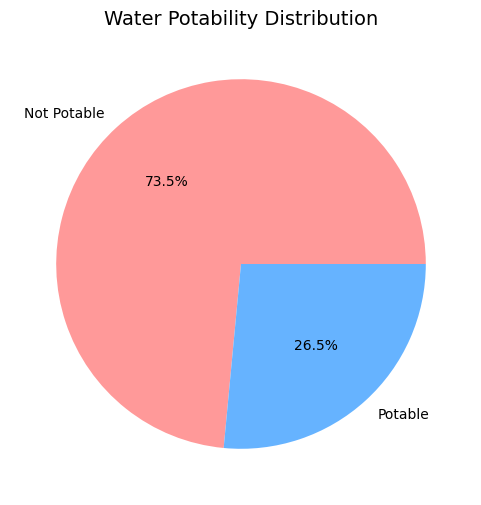

In [120]:
# Step 3: Apply formula
data['Potability_New'] = data.apply(potability_formula, axis=1)

# Step 4: Check potable vs non-potable counts
print("Potable vs Non-Potable Water Count:\n", data['Potability_New'].value_counts())

# Percentage split
print("\nPercentage:\n", data['Potability_New'].value_counts(normalize=True) * 100)

# Step 7: Visualization
plt.figure(figsize=(6,6))
data['Potability_New'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=['Not Potable', 'Potable'], colors=['#ff9999','#66b3ff'])
plt.title("Water Potability Distribution", fontsize=14)
plt.ylabel('')
plt.show()


In [122]:
data.shape

(3276, 10)

In [123]:
x = data.drop("Potability_New", axis=1)
y = data["Potability_New"]

In [124]:
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


**Logistic Regression**

In [125]:
model_lr = LogisticRegression(class_weight='balanced', solver='saga', max_iter=2000, random_state=42)
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(X_test)

C:\Users\Prajwal\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Performance Metrics:
Accuracy        : 66.77%
Precision       : 38.67%
Recall          : 61.88%
F1 Score        : 47.60%

Confusion Matrix:
[[339 157]
 [ 61  99]]


<Figure size 600x500 with 0 Axes>

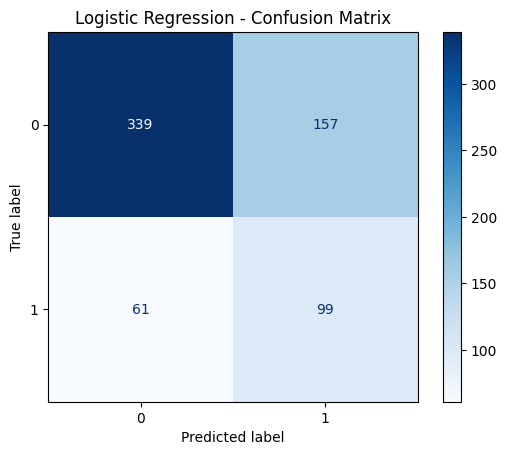


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.68      0.76       496
           1       0.39      0.62      0.48       160

    accuracy                           0.67       656
   macro avg       0.62      0.65      0.62       656
weighted avg       0.74      0.67      0.69       656



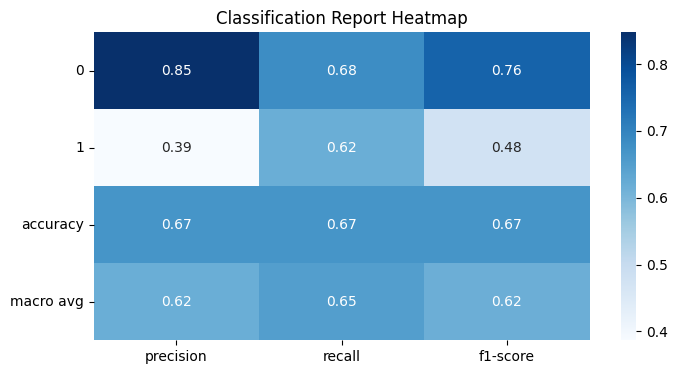

In [159]:
# Performance Metrics

Accuracy_lr = accuracy_score(y_test, y_pred_lr)
Precision_lr = precision_score(y_test, y_pred_lr, zero_division=0)
Recall_lr = recall_score(y_test, y_pred_lr, zero_division=0)
F1Score_lr = f1_score(y_test, y_pred_lr, zero_division=0)
Confusion_Matrix_lr = confusion_matrix(y_test, y_pred_lr)

# ---- Step 1: Print Logistic Regression Metrics in Percentage ----
print("Logistic Regression Performance Metrics:")
print(f"Accuracy        : {Accuracy_lr * 100:.2f}%")
print(f"Precision       : {Precision_lr * 100:.2f}%")
print(f"Recall          : {Recall_lr * 100:.2f}%")
print(f"F1 Score        : {F1Score_lr * 100:.2f}%")
print("\nConfusion Matrix:")
print(Confusion_Matrix_lr)


# Confusion Matrix Plot

plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix_lr, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# Classification Report (Text)

report = classification_report(y_test, y_pred_lr, zero_division=0)
print("\nClassification Report:\n")
print(report)

# Classification Report (Plot)


# Convert classification report to pandas DataFrame
report_dict = classification_report(y_test, y_pred_lr, zero_division=0, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.yticks(rotation=0)
plt.show()


**Decision Tree**

In [127]:
## Hyperparameter Tuning for Decision Tree

param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [128]:
model_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, cv=5, scoring='accuracy')
model_dt.fit(x_train, y_train)
best_dt = model_dt.best_estimator_
y_pred_dt = model_dt.predict(X_test)

Decision Tree Performance Metrics (in %):
Accuracy: 98.48%
Precision: 95.18%
Recall: 98.75%
F1 Score: 96.93%


<Figure size 600x500 with 0 Axes>

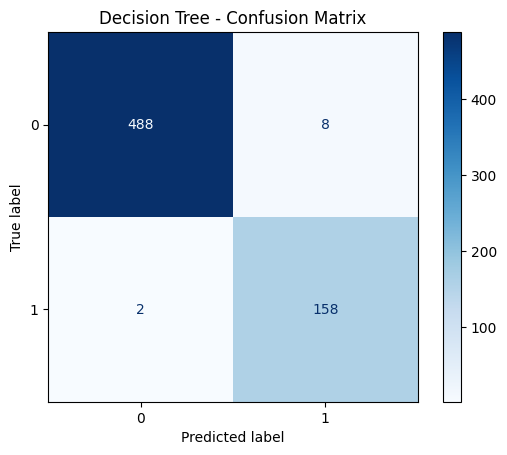


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       496
           1       0.95      0.99      0.97       160

    accuracy                           0.98       656
   macro avg       0.97      0.99      0.98       656
weighted avg       0.99      0.98      0.98       656



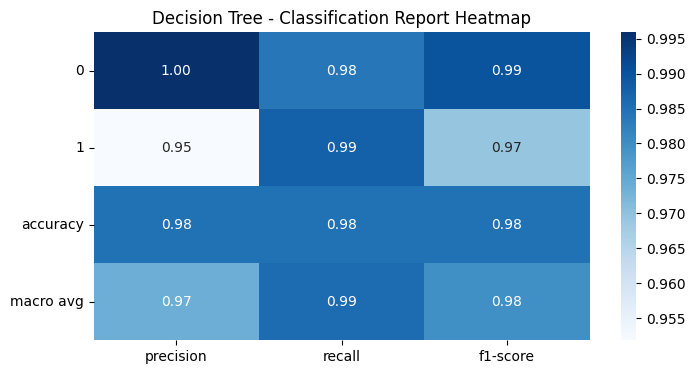

In [129]:

best_dt = model_dt.best_estimator_

y_pred_dt = model_dt.predict(X_test)



Accuracy_dt = accuracy_score(y_test, y_pred_dt)
Precision_dt = precision_score(y_test, y_pred_dt, zero_division=0)
Recall_dt = recall_score(y_test, y_pred_dt, zero_division=0)
F1Score_dt = f1_score(y_test, y_pred_dt, zero_division=0)
Confusion_Matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Performance Metrics (in %):")
print(f"Accuracy: {Accuracy_dt * 100:.2f}%")
print(f"Precision: {Precision_dt * 100:.2f}%")
print(f"Recall: {Recall_dt * 100:.2f}%")
print(f"F1 Score: {F1Score_dt * 100:.2f}%")

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix_dt, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# Classification Report (Text)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt, zero_division=0))

# Classification Report Heatmap

# Convert classification report to dataframe for plotting
report_dict_dt = classification_report(y_test, y_pred_dt, zero_division=0, output_dict=True)
report_df_dt = pd.DataFrame(report_dict_dt).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df_dt.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Decision Tree - Classification Report Heatmap")
plt.yticks(rotation=0)
plt.show()


**K-Neighbors**

In [130]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [131]:
Accuracy_knn = accuracy_score(y_test, y_pred_knn)
Precision_knn = precision_score(y_test, y_pred_knn, zero_division=0)
Recall_knn = recall_score(y_test, y_pred_knn, zero_division=0)
F1Score_knn = f1_score(y_test, y_pred_knn, zero_division=0)
Confusion_Matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print metrics in percentage format
print("KNN Performance Metrics (in %):")
print(f"Accuracy: {Accuracy_knn * 100:.2f}%")
print(f"Precision: {Precision_knn * 100:.2f}%")
print(f"Recall: {Recall_knn * 100:.2f}%")
print(f"F1 Score: {F1Score_knn * 100:.2f}%")

KNN Performance Metrics (in %):
Accuracy: 69.66%
Precision: 29.90%
Recall: 18.12%
F1 Score: 22.57%


<Figure size 600x500 with 0 Axes>

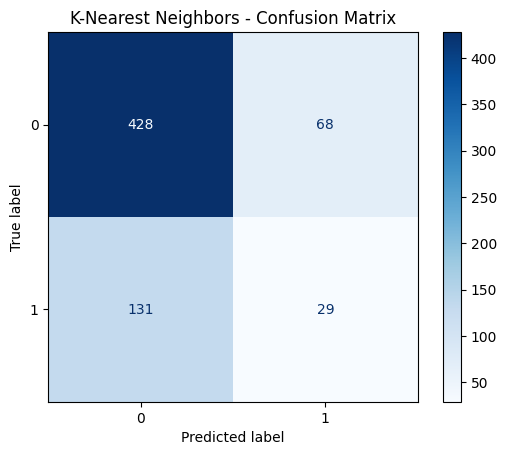

In [132]:
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix_knn, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("K-Nearest Neighbors - Confusion Matrix")
plt.show()

**AdaBoost**

In [133]:
model_ada = AdaBoostClassifier(random_state=42)
model_ada.fit(x_train, y_train)
y_pred_ada = model_ada.predict(X_test)

AdaBoost Performance Metrics (in %):
Accuracy: 98.17%
Precision: 96.84%
Recall: 95.62%
F1 Score: 96.23%


<Figure size 600x500 with 0 Axes>

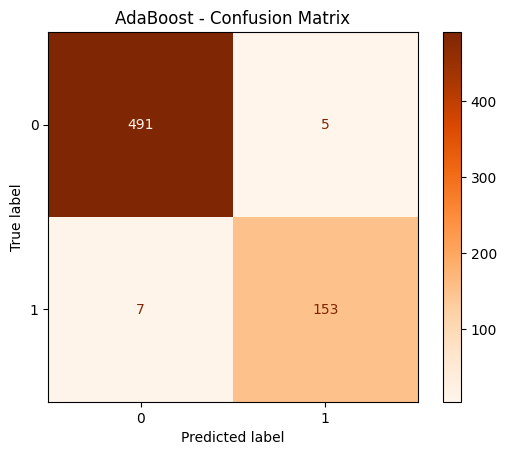

In [134]:
Accuracy_ada = accuracy_score(y_test, y_pred_ada)
Precision_ada = precision_score(y_test, y_pred_ada, zero_division=0)
Recall_ada = recall_score(y_test, y_pred_ada, zero_division=0)
F1Score_ada = f1_score(y_test, y_pred_ada, zero_division=0)
Confusion_Matrix_ada = confusion_matrix(y_test, y_pred_ada)

# ---- Step 2: Print Metrics in Percentage Format ----
print("AdaBoost Performance Metrics (in %):")
print(f"Accuracy: {Accuracy_ada * 100:.2f}%")
print(f"Precision: {Precision_ada * 100:.2f}%")
print(f"Recall: {Recall_ada * 100:.2f}%")
print(f"F1 Score: {F1Score_ada * 100:.2f}%")

# ---- Step 3: Confusion Matrix Visualization ----
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix_ada, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Oranges, values_format='d')
plt.title("AdaBoost - Confusion Matrix")
plt.show()


RandomForest

In [135]:

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [136]:
Accuracy_rf = accuracy_score(y_test, y_pred_rf)
Precision_rf = precision_score(y_test, y_pred_rf, zero_division=0)
Recall_rf = recall_score(y_test, y_pred_rf, zero_division=0)
F1Score_rf = f1_score(y_test, y_pred_rf, zero_division=0)
Confusion_Matrix_rf = confusion_matrix(y_test, y_pred_rf)


# ---- Step 2: Print Metrics in Percentage Format ----
print("Random Forest Performance Metrics (in %):")
print(f"Accuracy: {Accuracy_rf * 100:.2f}%")
print(f"Precision: {Precision_rf * 100:.2f}%")
print(f"Recall: {Recall_rf * 100:.2f}%")
print(f"F1 Score: {F1Score_rf * 100:.2f}%")

Random Forest Performance Metrics (in %):
Accuracy: 99.09%
Precision: 98.73%
Recall: 97.50%
F1 Score: 98.11%


**Random Forest**


Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       496
           1       0.99      0.97      0.98       160

    accuracy                           0.99       656
   macro avg       0.99      0.99      0.99       656
weighted avg       0.99      0.99      0.99       656



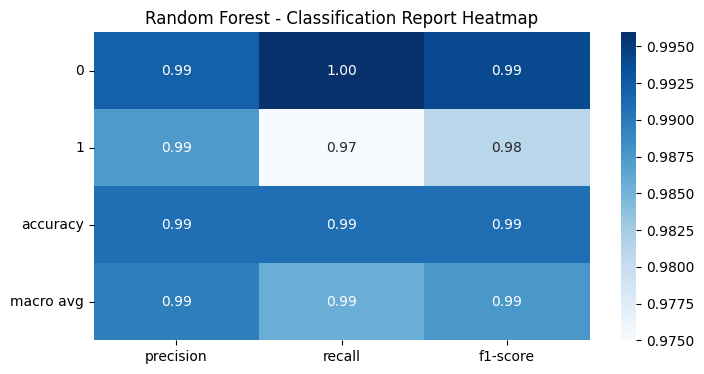

<Figure size 600x500 with 0 Axes>

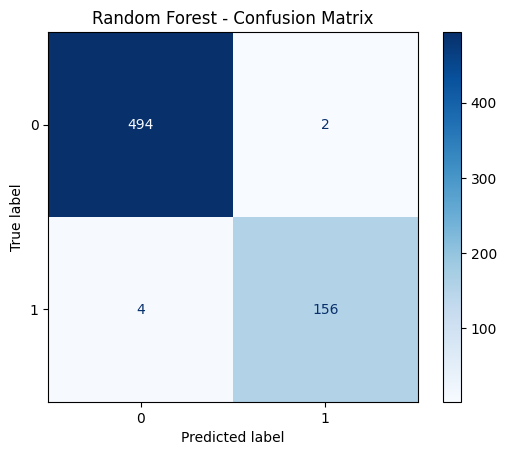

In [137]:

# Classification Report

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Classification Report Heatmap

report_dict_rf = classification_report(y_test, y_pred_rf, zero_division=0, output_dict=True)
report_df_rf = pd.DataFrame(report_dict_rf).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df_rf.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Random Forest - Classification Report Heatmap")
plt.yticks(rotation=0)
plt.show()



# Confusion Matrix Plot

plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix_rf, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()


XgBoost

In [138]:
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',  
    use_label_encoder=False
)

xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


C:\Users\Prajwal\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [11:57:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [139]:
Accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
Precision_xgb = precision_score(y_test, y_pred_xgb, zero_division=0)
Recall_xgb = recall_score(y_test, y_pred_xgb, zero_division=0)
F1Score_xgb = f1_score(y_test, y_pred_xgb, zero_division=0)
Confusion_Matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# ---- Step 2: Print Metrics in Percentage Format ----
print("XGBoost Performance Metrics (in %):")
print(f"Accuracy: {Accuracy_xgb * 100:.2f}%")
print(f"Precision: {Precision_xgb * 100:.2f}%")
print(f"Recall: {Recall_xgb * 100:.2f}%")
print(f"F1 Score: {F1Score_xgb * 100:.2f}%")



XGBoost Performance Metrics (in %):
Accuracy: 98.93%
Precision: 96.93%
Recall: 98.75%
F1 Score: 97.83%



Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       496
           1       0.97      0.99      0.98       160

    accuracy                           0.99       656
   macro avg       0.98      0.99      0.99       656
weighted avg       0.99      0.99      0.99       656



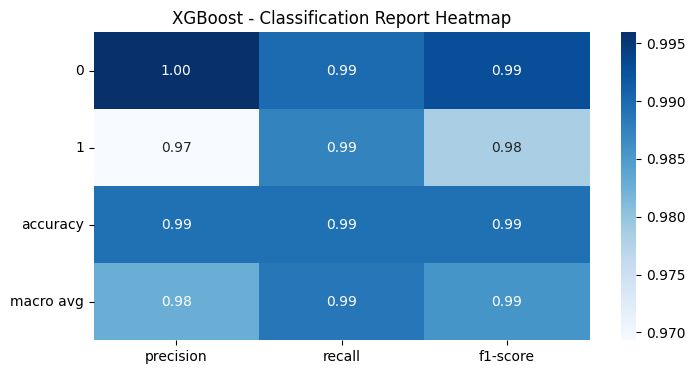

In [140]:
# Text Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

# Heatmap
report_dict_xgb = classification_report(y_test, y_pred_xgb, zero_division=0, output_dict=True)
report_df_xgb = pd.DataFrame(report_dict_xgb).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df_xgb.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("XGBoost - Classification Report Heatmap")
plt.yticks(rotation=0)
plt.show()


<Figure size 600x500 with 0 Axes>

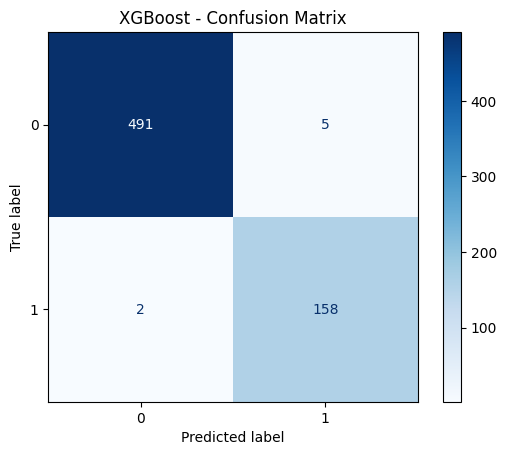

In [141]:
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix_xgb, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("XGBoost - Confusion Matrix")
plt.show()


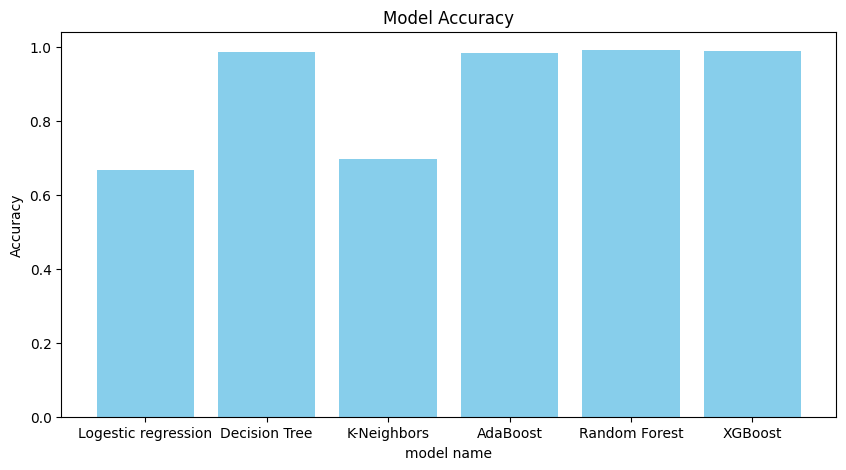

In [142]:
plt.figure(figsize=(10, 5))
categories = ['Logestic regression','Decision Tree','K-Neighbors','AdaBoost','Random Forest','XGBoost']
values = [Accuracy_lr, Accuracy_dt, Accuracy_knn, Accuracy_ada, Accuracy_rf,Accuracy_xgb]
plt.bar(categories, values, color='skyblue')

plt.title('Model Accuracy')
plt.xlabel('model name')
plt.ylabel('Accuracy')

plt.show()


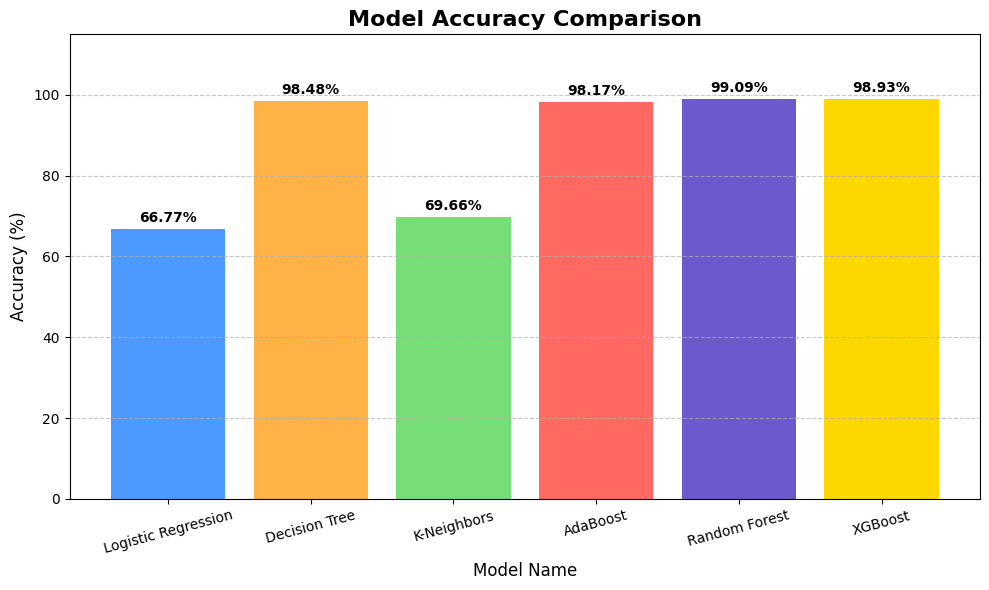

In [143]:
import numpy as np

# ---- Step 1: Prepare Data ----
categories = ['Logistic Regression', 'Decision Tree', 'K-Neighbors', 'AdaBoost', 'Random Forest', 'XGBoost']
values = [Accuracy_lr, Accuracy_dt, Accuracy_knn, Accuracy_ada, Accuracy_rf, Accuracy_xgb]

# Convert values to percentage
values_percent = [v * 100 for v in values]

# ---- Step 2: Create Bar Chart ----
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values_percent, color=['#4C9AFF', '#FFB347', '#77DD77', '#FF6961', '#6A5ACD', '#FFD700'])

# ---- Step 3: Customize Plot ----
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model Name', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 115)  # Limit between 0 and 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels
plt.xticks(rotation=15, fontsize=10)

# ---- Step 4: Add Value Labels on Top of Each Bar ----
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# ---- Step 5: Show Plot ----
plt.tight_layout()
plt.show()


In [144]:
from sklearn.metrics import mean_squared_error

# Example for Random Forest
MSE_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest MSE:", MSE_rf)

# Logistic Regression
MSE_lr = mean_squared_error(y_test, y_pred_lr)
print("Logistic Regression MSE:", MSE_lr)

# Decision Tree
MSE_dt = mean_squared_error(y_test, y_pred_dt)
print("Decision Tree MSE:", MSE_dt)

# K-Nearest Neighbors
MSE_knn = mean_squared_error(y_test, y_pred_knn)
print("K-Nearest Neighbors MSE:", MSE_knn)

# AdaBoost
MSE_ada = mean_squared_error(y_test, y_pred_ada)
print("AdaBoost MSE:", MSE_ada)

# XGBoost
MSE_xgb = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost MSE:", MSE_xgb)

# # MLP (Neural Network)
# MSE_mlp = mean_squared_error(y_test, y_pred_mlp)
# print("MLP Classifier MSE:", MSE_mlp)


Random Forest MSE: 0.009146341463414634
Logistic Regression MSE: 0.3323170731707317
Decision Tree MSE: 0.01524390243902439
K-Nearest Neighbors MSE: 0.30335365853658536
AdaBoost MSE: 0.018292682926829267
XGBoost MSE: 0.010670731707317074


In [148]:
import pandas as pd

# ---- Step 1: Create Dictionary with Model Metrics ----
results = {
    'Algorithm': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'K-Neighbors',
        'AdaBoost',
        'XGBoost'
    ],
    'Accuracy': [Accuracy_lr, Accuracy_dt, Accuracy_rf, Accuracy_knn, Accuracy_ada, Accuracy_xgb],
    'Precision': [Precision_lr, Precision_dt, Precision_rf, Precision_knn, Precision_ada, Precision_xgb],
    'Recall': [Recall_lr, Recall_dt, Recall_rf, Recall_knn, Recall_ada, Recall_xgb],
    'F1 Score': [F1Score_lr, F1Score_dt, F1Score_rf, F1Score_knn, F1Score_ada, F1Score_xgb]
}

# ---- Step 2: Create DataFrame ----
metrics_df = pd.DataFrame(results)

# ---- Step 3: Convert to Percentage Format ----
for col in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    metrics_df[col] = metrics_df[col] * 100  # Convert to percentage

# ---- Step 4: Sort by Accuracy (Descending) ----
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# ---- Step 5: Display Table ----
print(metrics_df)

# ---- Step 6: Styled Table for Jupyter/Colab ----
styled_metrics = metrics_df.style.background_gradient(cmap='Blues').format({
    'Accuracy': '{:.2f}%',
    'Precision': '{:.2f}%',
    'Recall': '{:.2f}%',
    'F1 Score': '{:.2f}%'
}).set_caption("Model Performance Comparison")

styled_metrics


             Algorithm   Accuracy  Precision  Recall   F1 Score
0        Random Forest  99.085366  98.734177  97.500  98.113208
1              XGBoost  98.932927  96.932515  98.750  97.832817
2        Decision Tree  98.475610  95.180723  98.750  96.932515
3             AdaBoost  98.170732  96.835443  95.625  96.226415
4          K-Neighbors  69.664634  29.896907  18.125  22.568093
5  Logistic Regression  66.768293  38.671875  61.875  47.596154


,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Random Forest,99.09%,98.73%,97.50%,98.11%
1,XGBoost,98.93%,96.93%,98.75%,97.83%
2,Decision Tree,98.48%,95.18%,98.75%,96.93%
3,AdaBoost,98.17%,96.84%,95.62%,96.23%
4,K-Neighbors,69.66%,29.90%,18.12%,22.57%
5,Logistic Regression,66.77%,38.67%,61.88%,47.60%


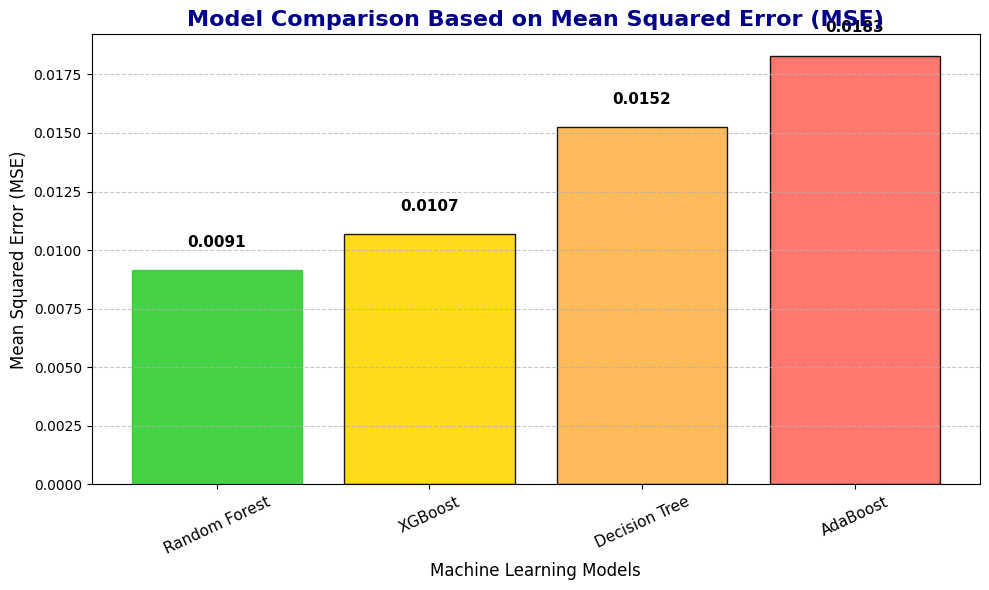

In [ ]:
import matplotlib.pyplot as plt

# ---- Step 1: Model Names ----
models = [
    'Random Forest',
    'XGBoost',
    'Decision Tree',
    'AdaBoost'
    # 'KNN',
    # 'Logistic Regression'
]

# ---- Step 2: Corresponding MSE Values ----
mse_values = [
    0.009146341463414634,  # Random Forest
    0.010670731707317074,  # XGBoost
    0.01524390243902439,   # Decision Tree
    0.018292682926829267   # AdaBoost
]

# ---- Step 3: Create Plot ----
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mse_values, 
               color=['#77DD77', '#FFD700', '#FFB347', '#FF6961'], 
               edgecolor='black', alpha=0.9)

# ---- Step 4: Highlight Best Model (Lowest MSE) ----
min_mse_index = mse_values.index(min(mse_values))
bars[min_mse_index].set_color('#32CD32')  # Green color for best model

# ---- Step 5: Add Values on Top of Bars ----
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0,
             height + 0.001,               # Small gap above bar
             f'{height:.4f}',              # 4 decimal precision
             ha='center', fontsize=11, fontweight='bold', color='black')

# ---- Step 6: Customize Labels and Title ----
plt.title("Model Comparison Based on Mean Squared Error (MSE)",
          fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)

# Rotate x-axis labels for clarity
plt.xticks(rotation=25, fontsize=11)

# ---- Step 7: Add Grid ----
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ---- Step 8: Tight Layout and Show ----
plt.tight_layout()
plt.show()


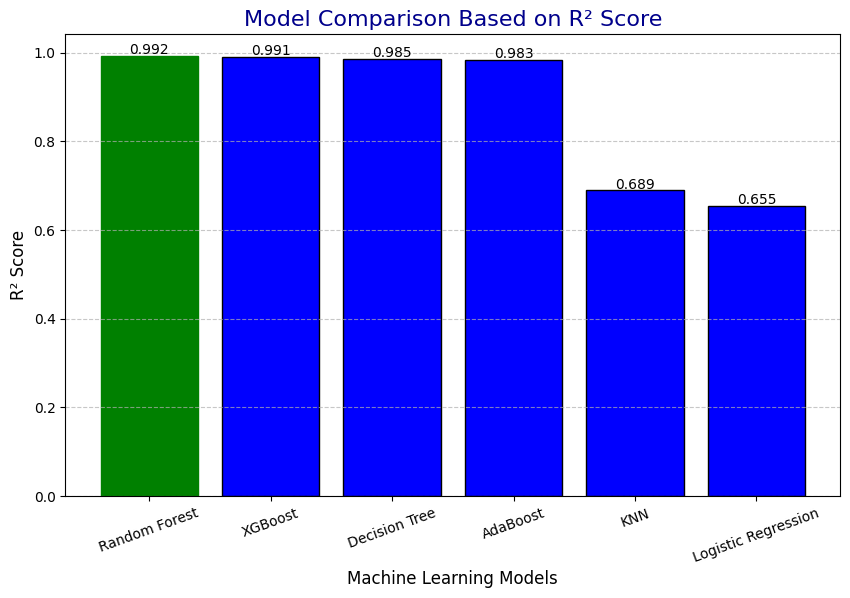

In [147]:
import matplotlib.pyplot as plt

# Model names
models = [
    'Random Forest',
    'XGBoost',
    'Decision Tree',
    'AdaBoost',
    'KNN',
    'Logistic Regression'
]

# Example R² values (replace with your calculated values)
r2_values = [
    0.992,  # Random Forest
    0.991,  # XGBoost
    0.985,  # Decision Tree
    0.983,  # AdaBoost
    0.689,  # KNN
    0.655   # Logistic Regression
]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models, r2_values, color='blue', edgecolor='black')

# Highlight highest R² (best model)
max_r2_index = r2_values.index(max(r2_values))
bars[max_r2_index].set_color('green')

# Adding values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.005,
             f'{height:.3f}', ha='center', fontsize=10, color='black')

# Labels and title
plt.title("Model Comparison Based on R² Score", fontsize=16, color='darkblue')
plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("R² Score", fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=20)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display plot
plt.show()


CSV file 'water_models_metrics.csv' created successfully!


C:\Users\Prajwal\AppData\Local\Temp\ipykernel_14832\3851368804.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df_metrics, palette='Blues_d')


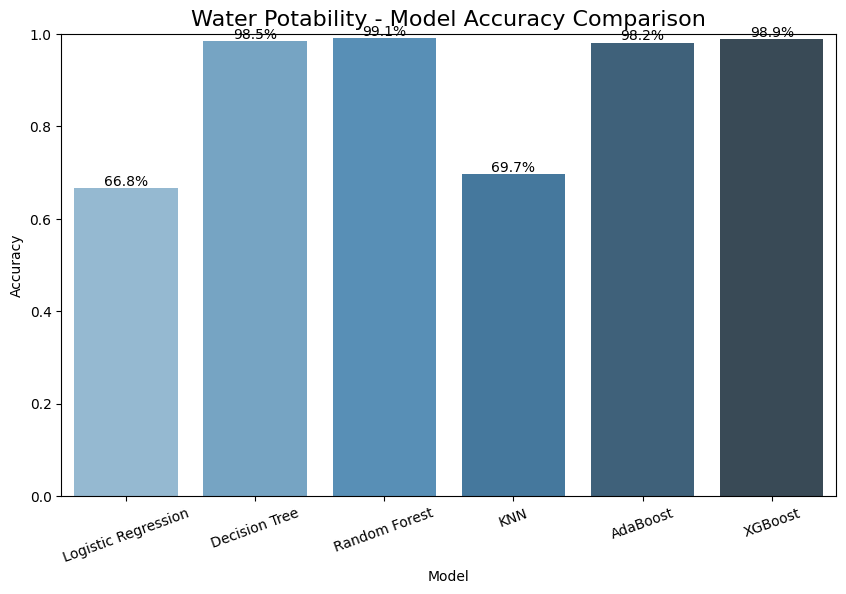

In [ ]:
# Water Potability - Model Metrics and CSV Export

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Step 2: Calculate metrics for all models
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'AdaBoost', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_ada),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr, zero_division=0),
        precision_score(y_test, y_pred_dt, zero_division=0),
        precision_score(y_test, y_pred_rf, zero_division=0),
        precision_score(y_test, y_pred_knn, zero_division=0),
        precision_score(y_test, y_pred_ada, zero_division=0),
        precision_score(y_test, y_pred_xgb, zero_division=0)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr, zero_division=0),
        recall_score(y_test, y_pred_dt, zero_division=0),
        recall_score(y_test, y_pred_rf, zero_division=0),
        recall_score(y_test, y_pred_knn, zero_division=0),
        recall_score(y_test, y_pred_ada, zero_division=0),
        recall_score(y_test, y_pred_xgb, zero_division=0)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr, zero_division=0),
        f1_score(y_test, y_pred_dt, zero_division=0),
        f1_score(y_test, y_pred_rf, zero_division=0),
        f1_score(y_test, y_pred_knn, zero_division=0),
        f1_score(y_test, y_pred_ada, zero_division=0),
        f1_score(y_test, y_pred_xgb, zero_division=0)
    ]
}

# Create DataFrame
df_metrics = pd.DataFrame(metrics)

# Step 3: Save metrics to CSV
df_metrics.to_csv("water_models_metrics.csv", index=False)
print("CSV file 'water_models_metrics.csv' created successfully!")

# Step 4: Plot Accuracy Comparison
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Accuracy', data=df_metrics, palette='Blues_d')

# Add value labels on top
for index, row in df_metrics.iterrows():
    plt.text(index, row.Accuracy + 0.005, f"{row.Accuracy*100:.1f}%", ha='center', fontsize=10)

plt.title("Water Potability - Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.xticks(rotation=20)
plt.show()
